# Data Visualization

## Import packages

In [163]:
# Data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [164]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [165]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

NumPy 1.23.5
Pandas 2.0.1
Matplotlib 3.7.1
Seaborn 0.12.2


---
## Loading data with Pandas

In [166]:
# Open the data
df = pd.read_csv('FinalContentDataset.csv', index_col=0)

In [167]:
df.head(3)

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,7/11/20 9:43,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/6/21 12:22,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/4/21 5:13,photo,studying,negative,15


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     24573 non-null  object
 1   Reaction Type  24573 non-null  object
 2   Datetime       24573 non-null  object
 3   Content Type   24573 non-null  object
 4   Category       24573 non-null  object
 5   Sentiment      24573 non-null  object
 6   Score          24573 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.5+ MB


In [169]:
scores = pd.DataFrame(df.groupby('Category')['Score'].sum()).sort_values(by=['Score'], ascending=False)
scores

,Score
Category,
animals,74965
science,71168
healthy eating,69339
technology,68738
food,66676
culture,66579
travel,64880
cooking,64756
soccer,57783


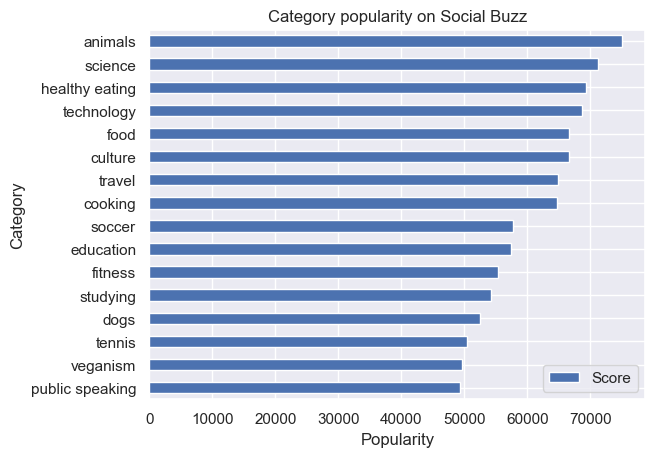

In [170]:
scores.plot(kind='barh')

plt.title('Category popularity on Social Buzz')
plt.xlabel('Popularity')
plt.ylabel('Category')

#Flips the chart vertically
plt.gca().invert_yaxis()

plt.show()

In [171]:
categories = (df.groupby(['Category', 'Sentiment'])
              .size()
              .reset_index(name='Sentiment Total')
              .sort_values(['Sentiment', 'Sentiment Total'], ascending=False)
              .reset_index(drop=True))
categories

,Category,Sentiment,Sentiment Total
0,animals,positive,1050
1,science,positive,1015
2,healthy eating,positive,985
3,technology,positive,974
4,culture,positive,943
5,food,positive,943
6,cooking,positive,932
7,travel,positive,918
8,soccer,positive,817
9,education,positive,815


In [172]:
categories['Sentiment'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In [173]:
def plot_sentiment_scores(categories, sentiment):
    # Filter the categories based on the Sentiment
    sentiment_scores = categories[categories['Sentiment'] == sentiment]

    # Plot the sentiment scores
    sentiment_scores[['Category', 'Sentiment Total']].set_index('Category').plot(kind='bar', figsize=(16, 9))

    plt.title(f'Total {sentiment.capitalize()} Sentiment', fontsize=20)
    plt.xlabel('Categories')
    plt.ylabel('Total Sentiment')

    plt.show()


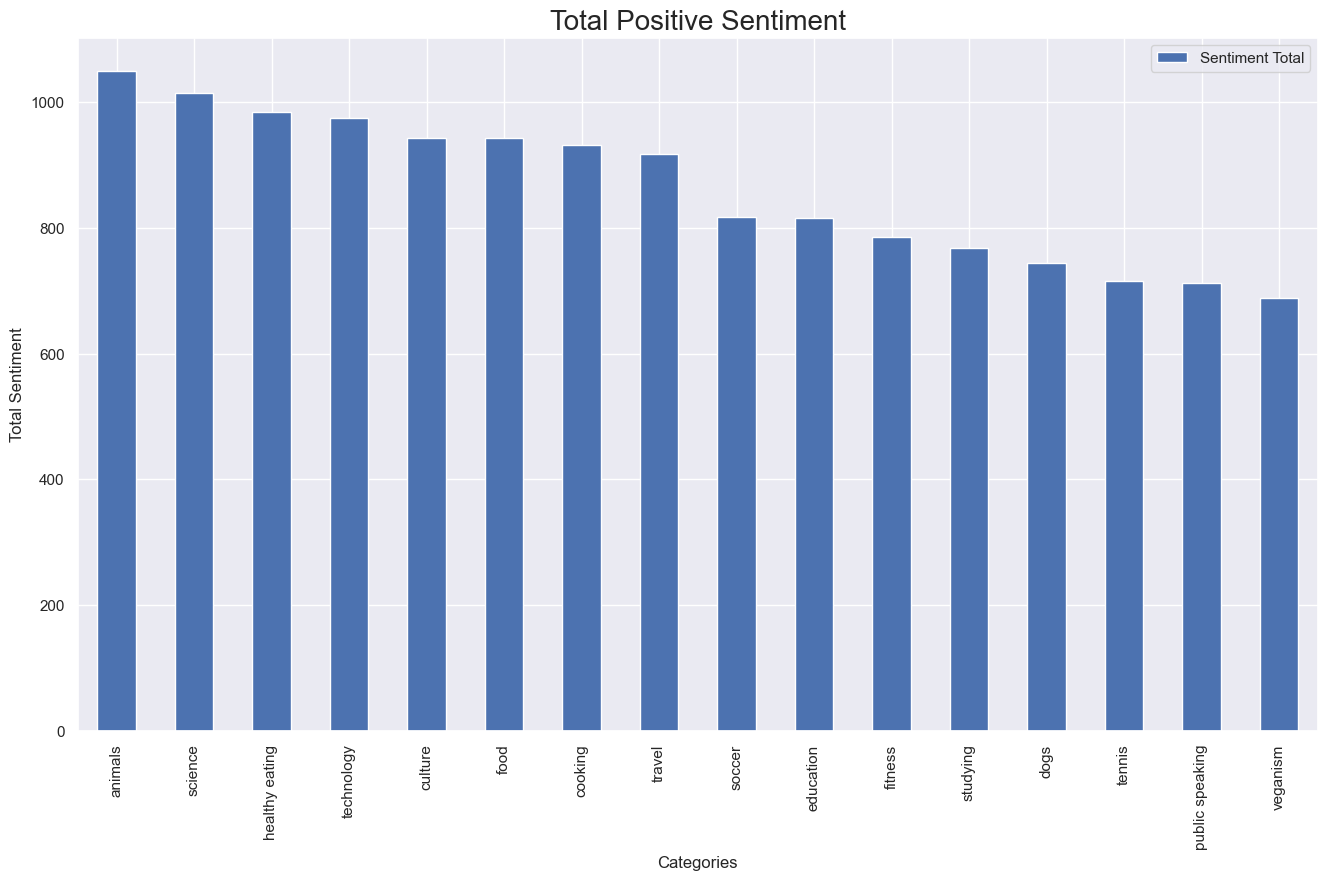

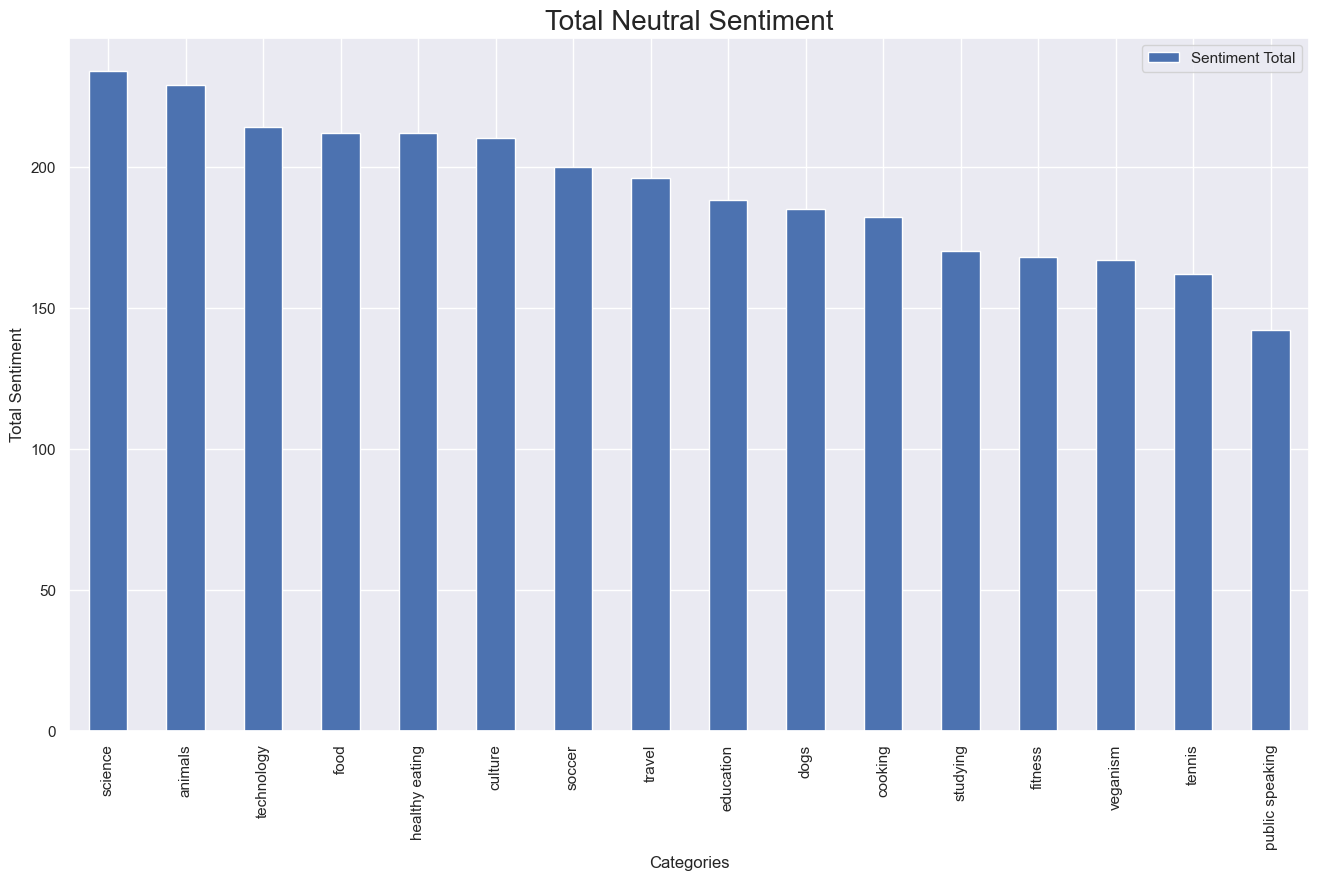

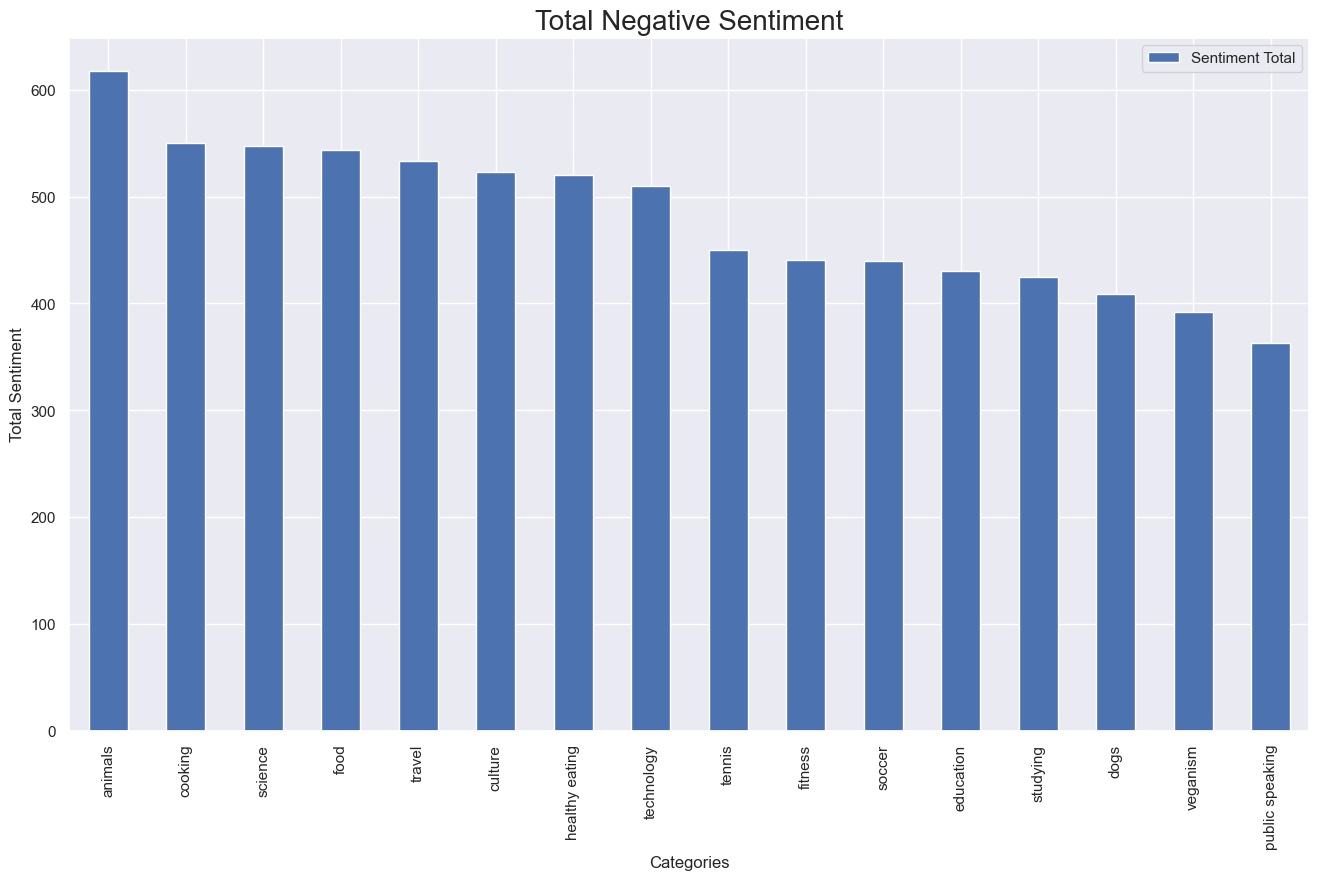

In [174]:
plot_sentiment_scores(categories, 'positive')
plot_sentiment_scores(categories, 'neutral')
plot_sentiment_scores(categories, 'negative')

In [175]:
total_sentiment = (df.groupby('Category')['Sentiment']
                   .value_counts()
                   .unstack()
                   .assign(Total=lambda x: x.sum(axis=1))
                   .sort_values(by='Total', ascending=False)
                   .drop(columns='Total'))
total_sentiment

Sentiment,negative,neutral,positive
Category,,,
animals,618,229,1050
science,547,234,1015
healthy eating,520,212,985
food,544,212,943
technology,510,214,974
culture,523,210,943
cooking,550,182,932
travel,533,196,918
soccer,440,200,817


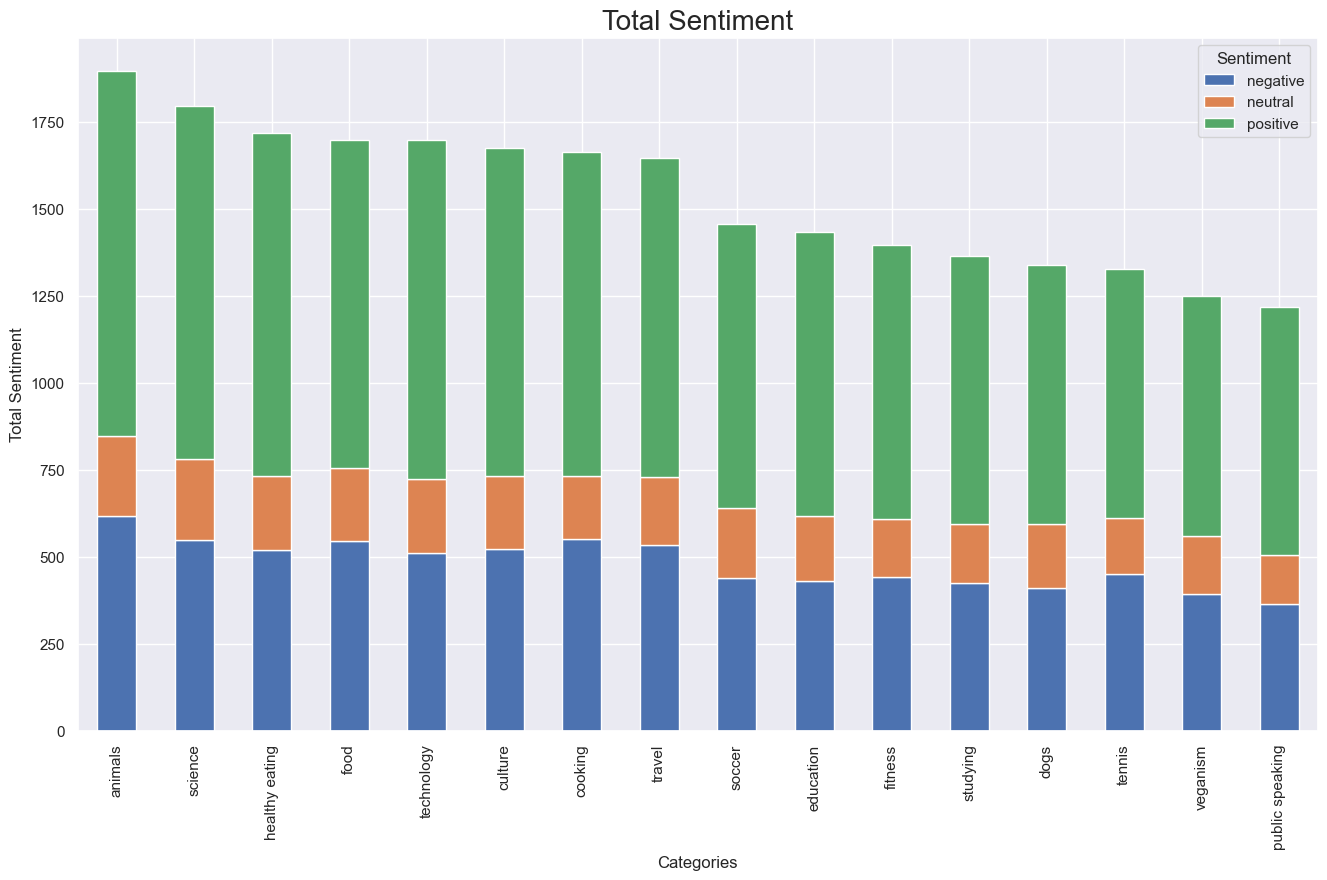

In [176]:
total_sentiment.plot(kind='bar', stacked=True, figsize=(16, 9))

plt.title('Total Sentiment', fontsize=20)
plt.xlabel('Categories')
plt.ylabel('Total Sentiment')

plt.show()